# Progettino AQM

# Alla ricerca dell' autovalore dell'hamiltoniana dello stato fondamentale

#### Autori:
Dott. Michele Grossi<br>
Francesco De Luca<br>
Ian Gremese<br>
Carlo Zollo

### Armamentario generale, da caricare prima delle diverse operazioni

#### Diagonalizzazione computazionale "classica"

Codice funzionale alla compilazione delle hamiltoniane da diagonalizzare.

In [16]:
from qiskit.quantum_info.operators import Operator, Pauli

Xp = Operator(Pauli('X'))
Zp = Operator(Pauli('Z'))
Yp = Operator(Pauli('Y'))
Id = Operator(Pauli('I'))

Funzione per la diagonalizzazione classica di una lista di lunghezza variabile di operatori $\hat H$, che ha la forma `([H0, H1, H2, ...], )`.

In [17]:
import numpy as np
from numpy import linalg

def class_par_H_diagonalizer(*H):
    E_l = []
    P_l = []
    Eivals = []
    GSvals = []
    num_qubits = 2

    for k in H[0]: #H is ([H0, H1, ...],), so Hj can be selected as H[0][j]
        E_l, P_l = linalg.eig(k.data)
        E_l = np.real(E_l)
        Eivals.append(np.sort(E_l))
        GSvals.append(np.min(E_l))
        
    return GSvals, Eivals

Funzione per il grafico dei soli valori della diagonalizzazione classica.

In [18]:
import matplotlib.pyplot as plt

def plot_class(lists):

    #plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots(figsize=(9,6), dpi=100)#, fontsize=8)

    plt.xticks(B)

    #ax.scatter(b, energy, marker='o')
    ax.scatter(B, lists[0], marker='o')
    ax.plot(B, lists[1], color="#000000", linewidth=0.5)

    ax.set(xlabel='B field', ylabel='Energy', title='')

    ax.grid()
    plt.show()

#### Diagonalizzazione quantistica con il VQE

Codice per la scrittura delle hamiltoniane da diagonalizzare:

In [19]:
import numpy as np
from numpy import linalg
from qiskit.opflow import X, Y, Z, I

Funzione che cerca il minimo autovalore dell'hamiltoniana:

In [20]:
from IPython.display import display as ipd_display, clear_output as ipd_clear
from qiskit.algorithms import VQE

def VQE_par_H_diagonalizer(local_vqe,*H):
    
    GSvals = []
    meanerr = []
    
    for i in range(len(H[0])):
        ipd_clear(wait=True)
        ipd_display("%da iterazione di %d"%(i+1,len(H[0])))
    
        local_result = local_vqe.compute_minimum_eigenvalue(H[0][i])
        GSvals.append(np.real(local_result.eigenvalue))
        
        meanerr.append(intermediate_info['stddev'][-1])
        
    return GSvals, meanerr

Funzione per la raccolta di dati relativi all'ottimizzazione del VQE:

In [21]:
intermediate_info = {
    'nfev': [],
    'parameters': [],
    'energy': [],
    'stddev': []
}

def callback(nfev, parameters, energy, stddev):
    intermediate_info['nfev'].append(nfev)
    intermediate_info['parameters'].append(parameters)
    intermediate_info['energy'].append(energy)
    intermediate_info['stddev'].append(stddev)

In [22]:
#import matplotlib as mpl
#mpl.rcParams.update({'font.family': 'Linux Libertine', 'text.latex.preamble': r'\usepackage{lmr}',})

Funzione per il grafico dei valori della diagonalizzazione classica e quantistica:

In [23]:
import matplotlib.pyplot as plt

def plot_tot(lists):

    #plt.rcParams["figure.figsize"] = (20,10)
    fig, ax = plt.subplots(figsize=(9,6), dpi=100)

    plt.xticks(B)

    #ax.scatter(b, energy, marker='o')
    ax.scatter(B, lists[0], marker='o')
    ax.plot(B, lists[1], color="#000000", linewidth=0.5)
    
    #itero sulle diverse tecniche che ho utilizzato
    for i in range(2,len(lists)):
        ax.scatter(B, lists[i], marker='x')

    ax.set(xlabel='B field', ylabel='Energy', title='')

    ax.grid()
    plt.show()

## Hamiltoniana n. 2: Interazioni anisotrope fra spin in campo magnetico $B$

$$\hat H = - \sum_{i,j=1\\i<j}^n J\left( \hat X^{(i)}\hat X^{(j)} + \gamma_y\hat Y^{(i)}\hat Y^{(j)} + \gamma_z\hat Z^{(i)}\hat Z^{(j)} \right) - B \sum_{i=1}^n Z^{(i)}$$

### Diagonalizzazione computazionale "classica"

#### Costruzione di $\hat H$
Costruiamo la lista delle hamiltoniane sui diversi valori di B:

In [90]:
import numpy as np
from qiskit.opflow import X, Y, Z, I

def Spin_Magnet_Hamilton(Natoms,J,gy,gz,B):
    
    #Builds the N-atoms Hamiltonian for anisotropic Magnetic field-spin interaction
    #initialize 0-dimensional Operators
    field=Operator([0])
    spin=Operator([0])
    tmp=Operator([0])
    for i in range(1,Natoms+1):
        field=(field^I)+(B*((I^(i-1))^Z)) #Adds the spin field interaction for each atom
        spin=(spin^I) 
        if i>1:
            for j in range (2,i+1): #spin-spin interaction term
                tmp=Operator(np.zeros((2**i,2**i)))
                tmp=tmp+(J*((I^(j-2))^X^(I^(i-j))^X))
                tmp=tmp+(J*gy*((I^(j-2))^Y^(I^(i-j))^Y))
                tmp=tmp+(J*gz*((I^(j-2))^Z^(I^(i-j))^Z)) 
            spin=spin+tmp
            tmp=Operator([0])
    return(spin+field)
    

In [93]:
cH = []
J = -2.
gy = 0.5
gz = 0.
B = np.linspace(-1.8,1.8,15).tolist()
for k in B:
    cH.append(J * (Xp.tensor(Xp) + gy*Yp.tensor(Yp) +gz* Zp.tensor(Zp)) +\
        k * (Zp.tensor(Id) + Id.tensor(Zp)))

#### Algoritmo

Invochiamo la funzione per la diagonalizzazione classica computazionale:

In [10]:
cGSEigE, EigE = class_par_H_diagonalizer(cH)

Visualizziamo il grafico degli autovalori determinati classicamente:

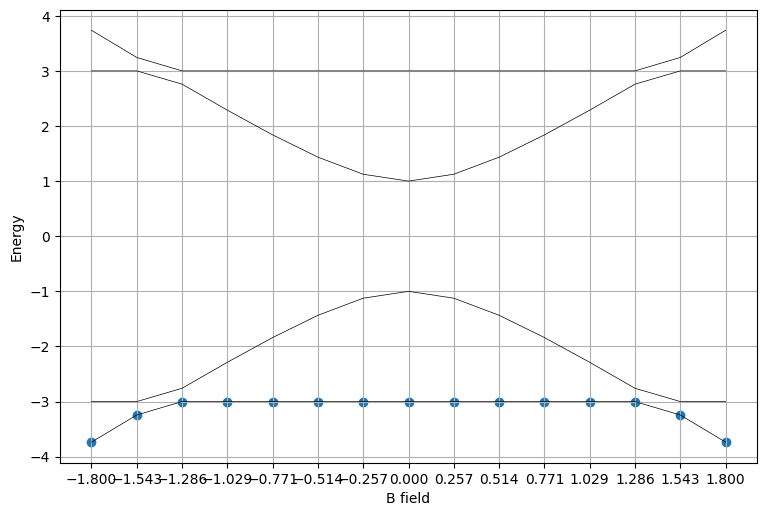

In [11]:
plot_class([cGSEigE, EigE])

### Diagonalizzazione quantistica con il VQE

#### Costruzione di $\hat H$
Costruiamo la lista delle hamiltoniane sui diversi valori di B:

In [12]:
qH = []
J = -2.
gy = 0.5
gz = 0.
B = np.linspace(-1.8,1.8,15).tolist()
    
for k in B:
    hspinz = J * ( (X^X) + gy*(Y^Y) + gz*(Z^Z) )
    hfield = k * ( Z^I ) + k * ( I^Z )
    qH = qH + [(hspinz + hfield)]

#### Algoritmo

Facciamo una scelta dell'ansatz, fra `EfficientSU2` ecc., impostandone i parametri secondo la definizione che abbiamo dato al nostro problema.

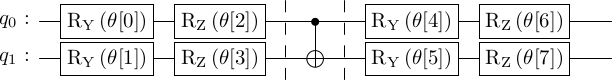

In [13]:
from qiskit.circuit.library import EfficientSU2

num_qubits = 2
# the rotation gates are chosen randomly, so we set a seed for reproducibility
ansatz = EfficientSU2(num_qubits, reps=1, entanglement='linear', insert_barriers=True) 
ansatz.decompose().draw('latex', style='iqx')

Scegliamo l'ottimizzatore per il VQE fra `SPSA`, `COBYLA` ecc.: 

In [14]:
import numpy as np
from qiskit.algorithms.optimizers import SPSA

optimizer = SPSA(maxiter=50)

np.random.seed(10)  # seed for reproducibility
initial_point = np.random.random(ansatz.num_parameters)

Costruiamo la funzione per il VQE con ansatz, ottimizzatore, stato iniziale, "quantum instance" e funzione di callback scelti e facciamo eseguire il VQE con i parametri scelti:

In [24]:
from qiskit.providers.basicaer import QasmSimulatorPy  # local simulator

local_vqe = VQE(ansatz=ansatz,
                optimizer=optimizer,
                initial_point=initial_point,
                quantum_instance=QasmSimulatorPy(),
                callback=callback)

qGSEigE, meanerr = VQE_par_H_diagonalizer(local_vqe,qH)

'15a iterazione di 15'

Visualizzo stime delle energie dei GS e stime degli errori:

In [25]:
print('Eigenvalues:','Mean error:')
for i in range(len(qGSEigE)):
    print(qGSEigE[i],meanerr[i])

Eigenvalues: Mean error:
-3.6468750000000005 0.07565569554172623
-3.1710937500000007 0.07668785159229637
-2.882254464285714 0.06751227951591234
-2.6707589285714284 0.06336432933768091
-2.3654575892857146 0.05858629812486438
-2.938783482142857 0.013242091740670812
-2.0961495535714283 0.03562040195334451
-2.962890625 0.010485797211423812
-2.9140625 0.01613393315304551
-2.9853236607142857 0.007244245227395168
-2.948437499999999 0.01787061864009287
-2.211272321428572 0.06906736784221745
-2.9157366071428577 0.0696505857552867
-3.2616629464285722 0.07529171058308166
-3.5800781249999996 0.07805842328478921


Visualizzo il grafico con i risultati classici e della VQE:

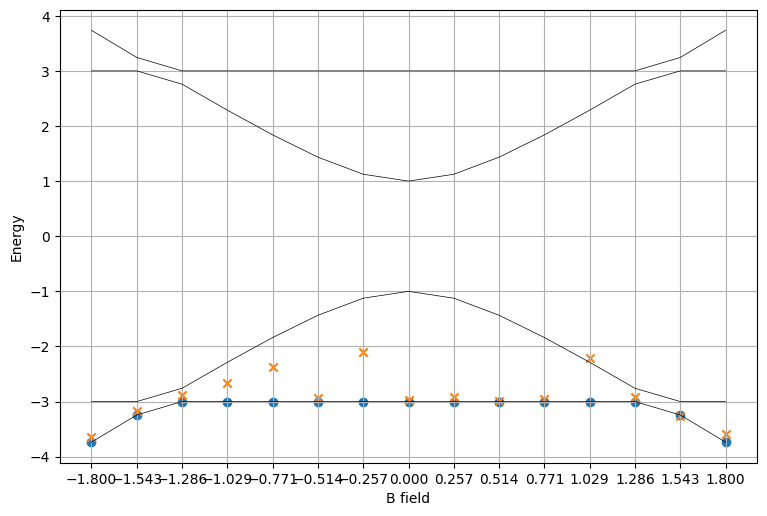

In [30]:
plot_tot([cGSEigE, EigE, qGSEigE])